# 1.0 DW - Descubrimiento de datos

En esta etapa de data wrangling se realiza el descubrimiento de datos, para conocer el tipo de datos y la estructura de los mismos.

### Observaciones
Como tenemos dos datasets vamos a trabajarlos por separado en primera instancia para ver como los podemos unificar luego y hacer un analisis integrado. 
- En este notebook 0.2-wines-data.wranling.ipynb vamos a trabajar con los datos de los wines_dataset.csv
- En el notebook 0.2-wines.spa-data.wranling.ipynb vamos a trabajar con los datos de los wines_SPA.csv

## Import libraries

In [1]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [3]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.visualization.analysis_univariate import univariate_analysis
import src.utils.statistics as stats

## Set up

In [4]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

In [5]:
# Definimos el constantes de colores de acuerdo al negocio para usar en los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [6]:
# Obtenemos la ruta de los csv's que vamos a utilizar
CHEMICAL_WINE_RAW_PATH = data_dir("raw", "wine_dataset.csv")
COMERCIAL_WINE_RAW_PATH = data_dir("raw", "wines_SPA.csv")

CHEMICAL_WINE_RAW_PATH , COMERCIAL_WINE_RAW_PATH

(WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/raw/wine_dataset.csv'),
 WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/raw/wines_SPA.csv'))

In [7]:
# Leemos los csv's y los guardamos en un dataframe
df_wine_chemical = pd.read_csv(CHEMICAL_WINE_RAW_PATH)
df_wine_comercial = pd.read_csv(COMERCIAL_WINE_RAW_PATH)

## Dataset Quimico

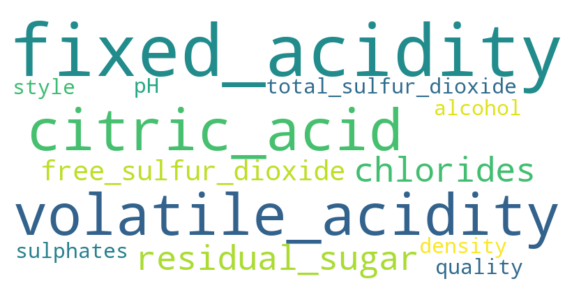

In [8]:
#Mostramos las columnas del dataframe
words_cloud(list(df_wine_chemical.columns))

In [9]:
#Vista previa de 5 datos aleatorios
df_wine_chemical.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
4406,7.5,0.18,0.72,9.6,0.039,53.0,151.0,0.99802,3.03,0.46,8.9,5,white
1733,6.8,0.27,0.22,8.1,0.034,55.0,203.0,0.99610,3.19,0.52,8.9,5,white
4997,6.1,0.33,0.32,7.8,0.052,52.0,183.0,0.99657,3.39,0.65,9.5,5,white
4048,6.7,0.27,0.26,2.3,0.043,61.0,181.0,0.99394,3.45,0.63,10.6,6,white
1241,9.8,0.37,0.39,2.5,0.079,28.0,65.0,0.99729,3.16,0.59,9.8,5,red


En principio podemos ver que tiene sentido que la mayor parte de los datos son numericos de tipo numerico, ya qu estamos tratando con un data set centrado en la composición quimica de los vinos. Como desconocemos las unidades de los registros suponemos que estan todos en distintas escalas.

### Estructura

In [10]:
# Shape del data set quimico
print(f"El dataset quimico tiene {df_wine_chemical.shape[0]} filas y {df_wine_chemical.shape[1]} columnas")


El dataset quimico tiene 6497 filas y 13 columnas


In [11]:
# Obtenemos información de las columnas de los datos
df_wine_chemical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


La mayoria de los datos son numericos, excepto style, que es una variable categorica. Para nuestro caso, la variable `quality` es una variable categorica ordinal, por lo que sería conveniente cambiar el tipo de tipo int64 a categorical.

In [31]:
#TODO: Cambiar el tipo de la variable quality a categorical ordinal

### Valores faltantes

In [12]:
#Determinamos si en el dataset hay valores faltantes.
df_wine_chemical.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

<AxesSubplot:>

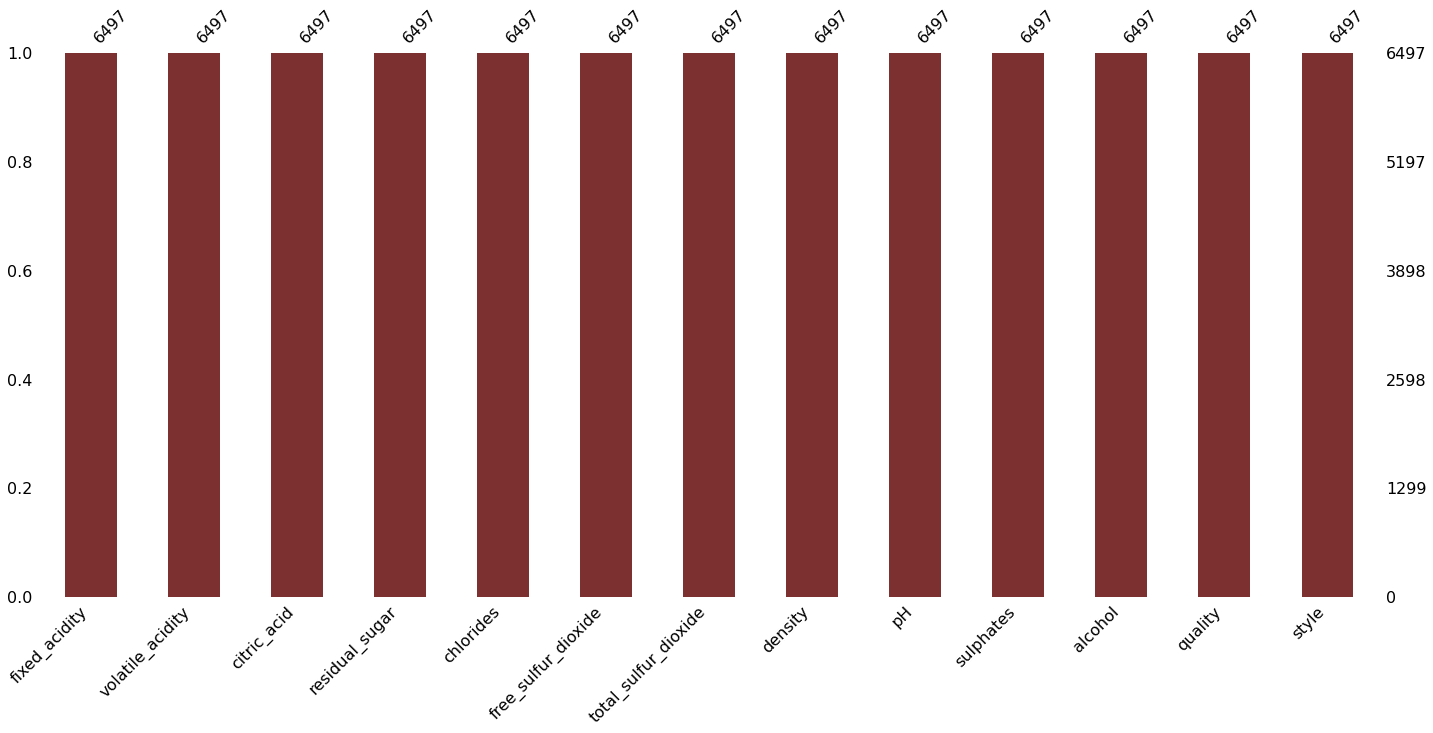

In [13]:
# Visualizamos los missings utilizando la libreria missingno
msno.bar(df_wine_chemical, color= COLOR_VINO_TINTO)

### Coherencia de los datos

In [14]:
# Mostramos las principales estadisticas de las columnas
df_wine_chemical.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,NaN,NaN,NaN,7.215307,1.296434,3.8,6.4,7.0,7.7,15.9
volatile_acidity,6497.0,NaN,NaN,NaN,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58
citric_acid,6497.0,NaN,NaN,NaN,0.318633,0.145318,0.0,0.25,0.31,0.39,1.66
residual_sugar,6497.0,NaN,NaN,NaN,5.443235,4.757804,0.6,1.8,3.0,8.1,65.8
chlorides,6497.0,NaN,NaN,NaN,0.056034,0.035034,0.009,0.038,0.047,0.065,0.611
free_sulfur_dioxide,6497.0,NaN,NaN,NaN,30.525319,17.7494,1.0,17.0,29.0,41.0,289.0
total_sulfur_dioxide,6497.0,NaN,NaN,NaN,115.744574,56.521855,6.0,77.0,118.0,156.0,440.0
density,6497.0,NaN,NaN,NaN,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,NaN,NaN,NaN,3.218501,0.160787,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,NaN,NaN,NaN,0.531268,0.148806,0.22,0.43,0.51,0.6,2.0


Algunos insights que podemos obtener de los datos son:
- La variable target, `quality` tiene tipos de calidad que van de 3 a 9
- `style` tiene dos tipos de categorias y la que mas se repite es `white`
- `citric_acid` tiene valores iguales a cero, pero a nivel de negocio no es un problema en primera instancia ya que es un compuesto que se le suele añadir a los vinos para regular la acidez del vino, pero no es algo que todos los vinos tienen necesariamente.

### quality

In [24]:
# Vemos todos los valores unicos de la columna quality
unique_quality = df_wine_chemical['quality'].unique().tolist()
unique_quality.sort()
unique_quality


[3, 4, 5, 6, 7, 8, 9]

Confirmamos que nuestra variable target tiene valores de 3 a 9, donde cada uno representa un nivel de calidad del vino.

In [58]:
# Convertimos el tipo de dato de la variable quality a categorica ordinal
df_wine_chemical['quality'] = df_wine_chemical['quality'].astype('category')

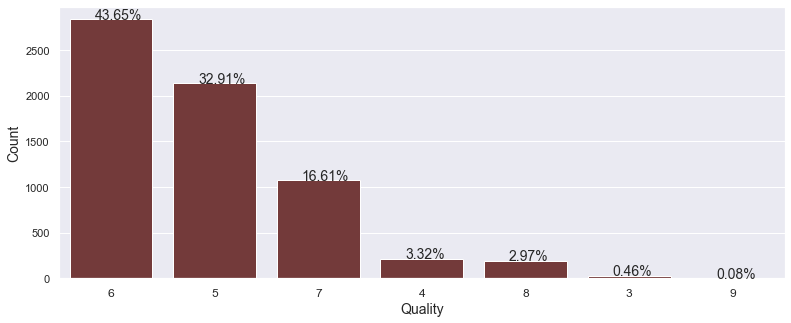

In [61]:
plt.figure(figsize=(13, 5))
ax = sns.countplot(data = df_wine_chemical, x='quality', order = df_wine_chemical.quality.value_counts().index, color=COLOR_VINO_TINTO)
plt.xticks(size=12)
plt.xlabel('Quality', size=14)
plt.ylabel('Count', size=14)

total = len(df_wine_chemical.quality)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.16
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 14)

Estamos en presencia de un problema de multiclase bastante desbalanceado. Debido a la poca cantidad de registros y a la gran cantidad de clases hablamos con el cliente y acordamos comprimir las clases en dos clases, una para calidad baja y otra para calidad alta evitando así un problema de overfitting. Resta definir como agrupamos las clases.

In [32]:
#TODO: Agrupar las clases en dos, calidad alta y calidad baja

array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>],
       [<AxesSubplot:title={'center':'residual_sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>],
       [<AxesSubplot:title={'center':'total_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

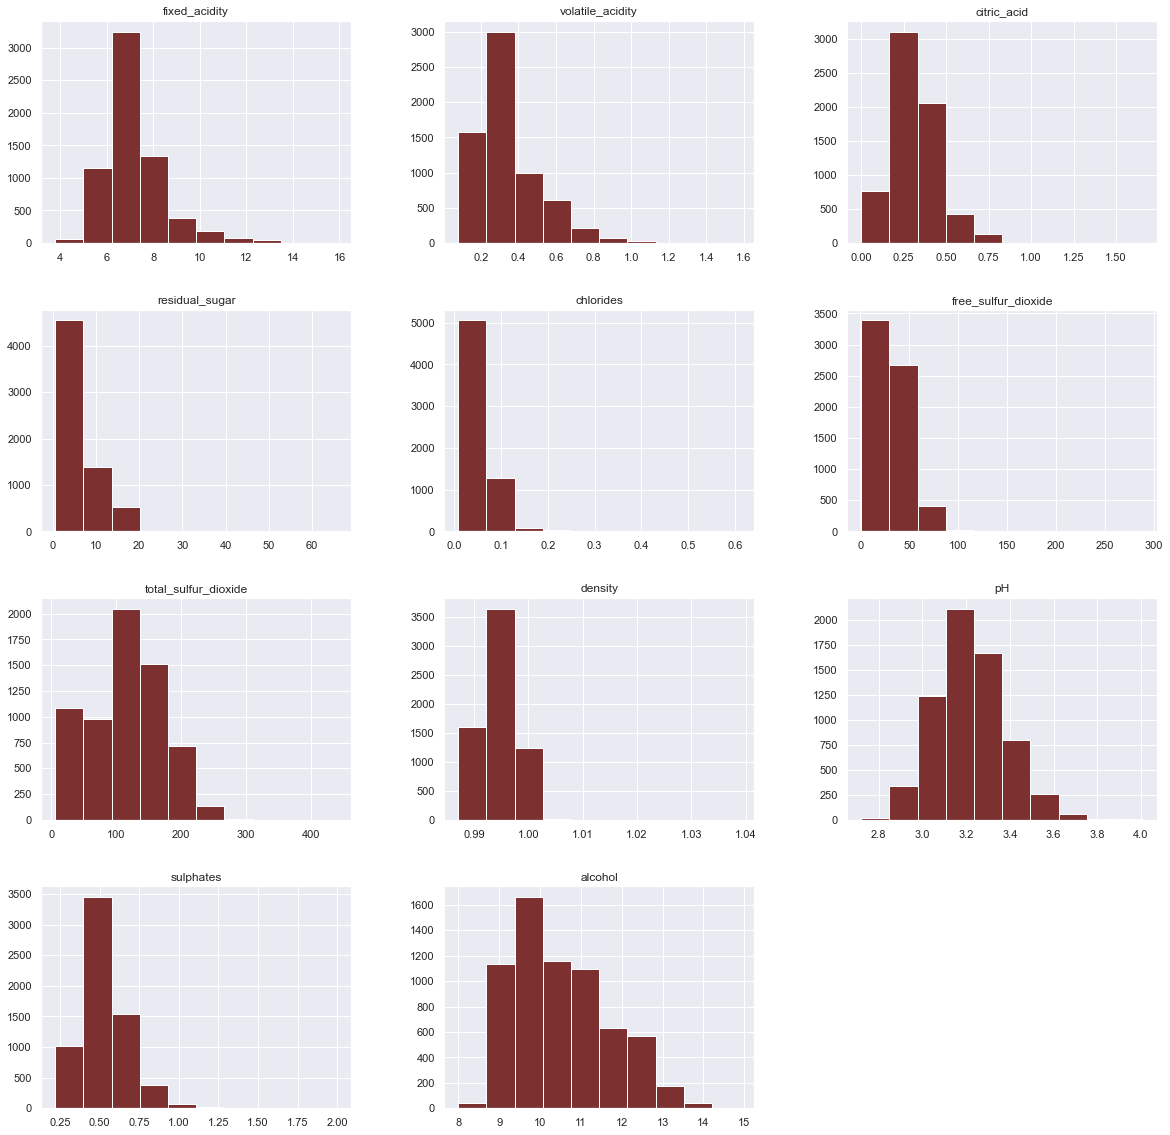

In [60]:
# Observamos las distribuciones de las columnas
df_wine_chemical.hist( figsize=(20,20), color=COLOR_VINO_TINTO)

## Dataset Comercial

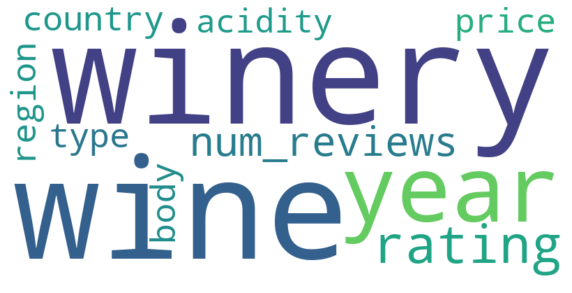

In [62]:
#Mostramos las columnas del dataframe
words_cloud(list(df_wine_comercial.columns))

In [63]:
#Vista previa de 5 datos aleatorios
df_wine_comercial.sample(5)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
5768,Contino,Rioja Graciano,2011,4.2,395,Espana,Rioja,61.94,Rioja Red,4.0,3.0
5729,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.00,Rioja Red,4.0,3.0
7014,Portal del Priorat,Clos del Portal Somni,2014,4.2,404,Espana,Priorato,77.36,Priorat Red,4.0,3.0
1324,Bosque de Matasnos,Bosque de Matasnos Etiqueta Blanca,2019,4.3,260,Espana,Ribera del Duero,26.90,Ribera Del Duero Red,NaN,NaN
6410,Vina Pedrosa,Gran Reserva,2011,4.2,410,Espana,Ribera del Duero,51.35,Ribera Del Duero Red,5.0,3.0


### Estructura

In [65]:
# Shape del data set comercial
print(f"El dataset comercial tiene {df_wine_comercial.shape[0]} filas y {df_wine_comercial.shape[1]} columnas")


El dataset comercial tiene 7500 filas y 11 columnas


In [70]:
# Obtenemos información de las columnas de los datos
df_wine_comercial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


- Hay cinco variables numericas, de las cuales cuatro son flotantes y una es entera
- Hay seis variables de tipo categoricas

### Valores faltantes

In [80]:
#Determinamos si en el dataset hay valores faltantes.
df_wine_comercial.isnull().sum().sort_values(ascending=False)

body           1169
acidity        1169
type            545
year              2
winery            0
wine              0
rating            0
num_reviews       0
country           0
region            0
price             0
dtype: int64

<AxesSubplot:>

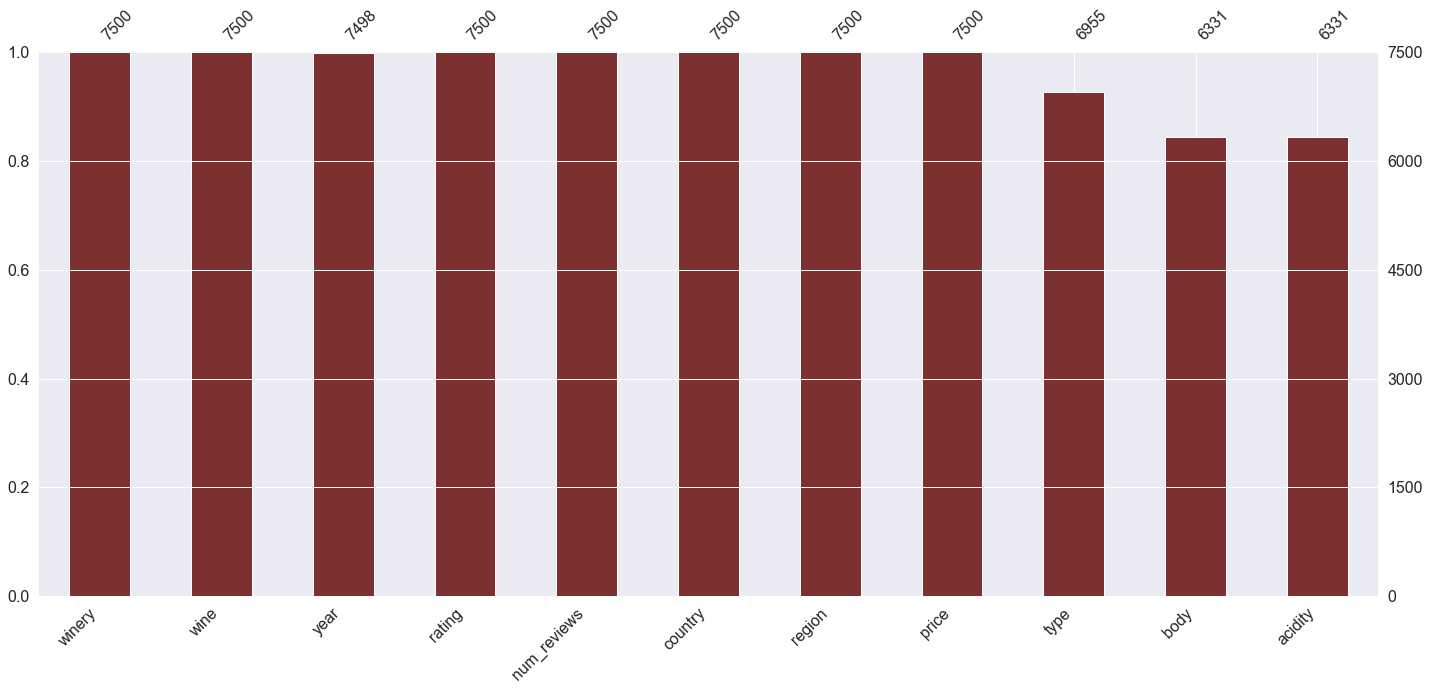

In [72]:
# Visualizamos los missings utilizando la libreria missingno
msno.bar(df_wine_comercial, color= COLOR_VINO_TINTO)

### Coherencia de los datos

In [73]:
# Mostramos las principales estadisticas de las columnas
df_wine_comercial.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7500.0,4.254933,0.118029,4.20,4.2,4.20,4.20,4.90
num_reviews,7500.0,451.109067,723.001856,25.00,389.0,404.00,415.00,32624.00
price,7500.0,60.095822,150.356676,4.99,18.9,28.53,51.35,3119.08
body,6331.0,4.158427,0.583352,2.00,4.0,4.00,5.00,5.00
acidity,6331.0,2.946612,0.248202,1.00,3.0,3.00,3.00,3.00


In [79]:
# describimos las columnas categoricas sin nulos
df_wine_comercial.describe(include='object').T


,count,unique,top,freq
winery,7500,480,Contino,457
wine,7500,847,Reserva,467
year,7498,71,2011,1190
country,7500,1,Espana,7500
region,7500,76,Rioja,2440
type,6955,21,Rioja Red,2357
